In [25]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [26]:
wine = load_wine()

In [27]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

In [28]:
print("Feature Names:", wine.feature_names)

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [29]:
wine_df = wine_df.dropna()
wine_df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [30]:
X = wine_df.drop(columns=['target'])
y = wine_df['target']

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random.randint(0, 100))

In [33]:
kmeans = KMeans(n_clusters=3, random_state=random.randint(0, 100))
kmeans.fit(X_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

C:\Users\singk\AppData\Local\Temp\ipykernel_14432\2938632515.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


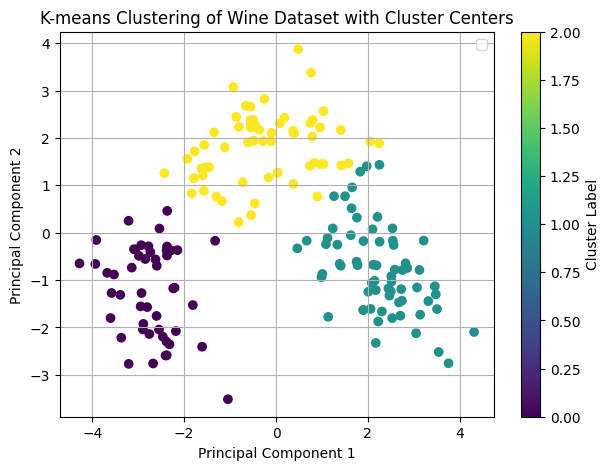

In [35]:
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('K-means Clustering of Wine Dataset with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
X_train = np.array([[14.23	,1.71	,2.43,	15.6	,127.0	,2.80	,3.06,	0.28,	2.29,	5.64	,1.04	,3.92	,165.0],
                    [12.4, 1.97, 2.0, 12.0, 120.0, 2.8, 3.08, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0]])


In [37]:
X_train_scaled = scaler.transform(X_train)

C:\Users\singk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
y_kmeans_new = kmeans.predict(X_train_scaled)
print("Predicted cluster labels for new data:", y_kmeans_new)

Predicted cluster labels for new data: [1 1]
